# Modelo de Regresión Lineal

In [108]:
import pandas as pd
import numpy as np


## Datos del Modelo 

In [109]:
datos= pd.DataFrame({"Grasa (g)":[7,5,8,4,3,5,5,5],
                     "Grasas Saturadas (g)":[4.5,3.5,5.5,2.5,2.0,3.5,3.0,3.5],
                    "Colesterol (g)": [0.25,0.15,0.25,0.15,0.10,0.15,0.15,0.15],
                    "Sodio (g)":[0.340,0.300,0.520,0.340,0.320,0.290,0.260,0.330], 
                    "Calorias": [80,70,100,60,50,70,60,70]}, 
                    index=["Kraft Deluxe American","Kraft VelveetaSlices",
                              "Private Selection","Ralphs Singles","Kraft 2% MilkSingles",
                              "Kraft Singles American","Borden Singles",
                              "Lake to LakeAmerican"])
datos

,Grasa (g),Grasas Saturadas (g),Colesterol (g),Sodio (g),Calorias
Kraft Deluxe American,7,4.5,0.25,0.34,80
Kraft VelveetaSlices,5,3.5,0.15,0.30,70
Private Selection,8,5.5,0.25,0.52,100
Ralphs Singles,4,2.5,0.15,0.34,60
Kraft 2% MilkSingles,3,2.0,0.10,0.32,50
Kraft Singles American,5,3.5,0.15,0.29,70
Borden Singles,5,3.0,0.15,0.26,60
Lake to LakeAmerican,5,3.5,0.15,0.33,70


## Estadística Básica

In [63]:
datos.describe()

,Grasa (g),Grasas Saturadas (g),Colesterol (g),Sodio (g),Calorias
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,5.250000,3.500000,0.168750,0.337500,70.000000
std,1.581139,1.101946,0.053033,0.078695,15.118579
min,3.000000,2.000000,0.100000,0.260000,50.000000
25%,4.750000,2.875000,0.150000,0.297500,60.000000
50%,5.000000,3.500000,0.150000,0.325000,70.000000
75%,5.500000,3.750000,0.175000,0.340000,72.500000
max,8.000000,5.500000,0.250000,0.520000,100.000000


## Coeficientes de Correlación de Pearson

In [64]:
datos.corr()

,Grasa (g),Grasas Saturadas (g),Colesterol (g),Sodio (g),Calorias
Grasa (g),1.000000,0.983904,0.958315,0.671649,0.956183
Grasas Saturadas (g),0.983904,1.000000,0.916698,0.708377,0.986117
Colesterol (g),0.958315,0.916698,1.000000,0.663211,0.890871
Sodio (g),0.671649,0.708377,0.663211,1.000000,0.792482
Calorias,0.956183,0.986117,0.890871,0.792482,1.000000


## Gráficas

In [65]:
import matplotlib.pyplot as plt

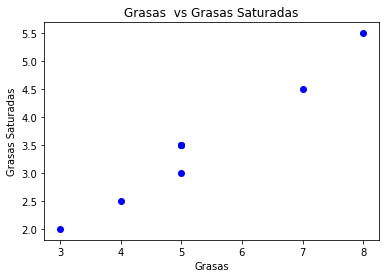

In [44]:
plt.scatter(datos["Grasa (g)"], datos["Grasas Saturadas (g)"], color="b")
plt.title("Grasas  vs Grasas Saturadas")
plt.xlabel("Grasas")
plt.ylabel("Grasas Saturadas")


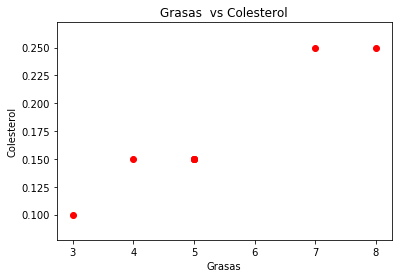

In [66]:
plt.scatter(datos["Grasa (g)"], datos["Colesterol (g)"], color="red")
plt.title("Grasas  vs Colesterol")
plt.xlabel("Grasas")
plt.ylabel("Colesterol")

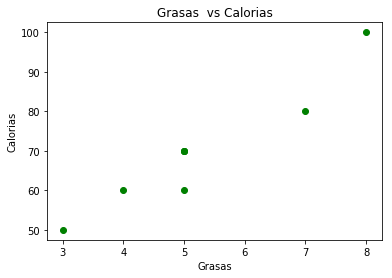

In [67]:
plt.scatter(datos["Grasa (g)"], datos["Calorias"], color="g")
plt.title("Grasas  vs Calorias")
plt.xlabel("Grasas")
plt.ylabel("Calorias")

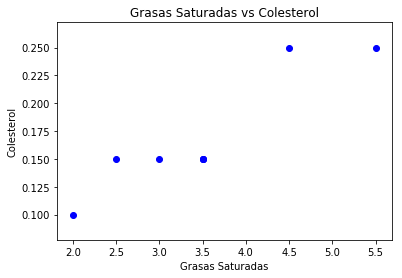

In [47]:
plt.scatter(datos["Grasas Saturadas (g)"], datos["Colesterol (g)"], color="b")
plt.title("Grasas Saturadas vs Colesterol")
plt.xlabel("Grasas Saturadas")
plt.ylabel("Colesterol")


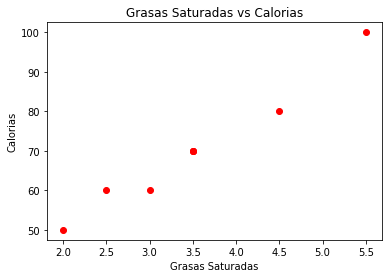

In [68]:
plt.scatter(datos["Grasas Saturadas (g)"], datos["Calorias"], color="r")
plt.title("Grasas Saturadas vs Calorias")
plt.xlabel("Grasas Saturadas")
plt.ylabel("Calorias")


## Modelo para predecir Grasa (g)

In [82]:
from sklearn.linear_model import LinearRegression
X_pred = datos.iloc[:,1:]

Y=datos["Grasa (g)"]

,Grasas Saturadas (g),Colesterol (g),Sodio (g),Calorias
Kraft Deluxe American,4.5,0.25,0.34,80
Kraft VelveetaSlices,3.5,0.15,0.30,70
Private Selection,5.5,0.25,0.52,100
Ralphs Singles,2.5,0.15,0.34,60
Kraft 2% MilkSingles,2.0,0.10,0.32,50
Kraft Singles American,3.5,0.15,0.29,70
Borden Singles,3.0,0.15,0.26,60
Lake to LakeAmerican,3.5,0.15,0.33,70


In [83]:
lm = LinearRegression()
lm.fit(X_pred, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Intersepción con el eje x

In [84]:
lm.intercept_

1.1408450704234756

## Coeficientes 

In [85]:
lm.coef_

array([ 1.59624413,  9.38967136,  0.46948357, -0.04600939])

## Porcentaje de exactitud del modelo

In [86]:
lm.score(X_pred, Y)*100

99.14151576123406

## Valor a predecir Grasa (g)

In [106]:
predecir = pd.DataFrame({
                     "Grasas Saturadas (g)":[4.5],
                    "Colesterol (g)": [0.25],
                    "Sodio (g)":[0.320], 
                    "Calorias": [70]})
predecir.shape

(1, 4)

## Predicción

In [107]:
lm.predict(predecir)

array([7.60093897])